In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
df = pd.read_csv("data/raw_data/loan_approval_dataset.csv")

In [4]:
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


Available columns in the dataset:
['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']


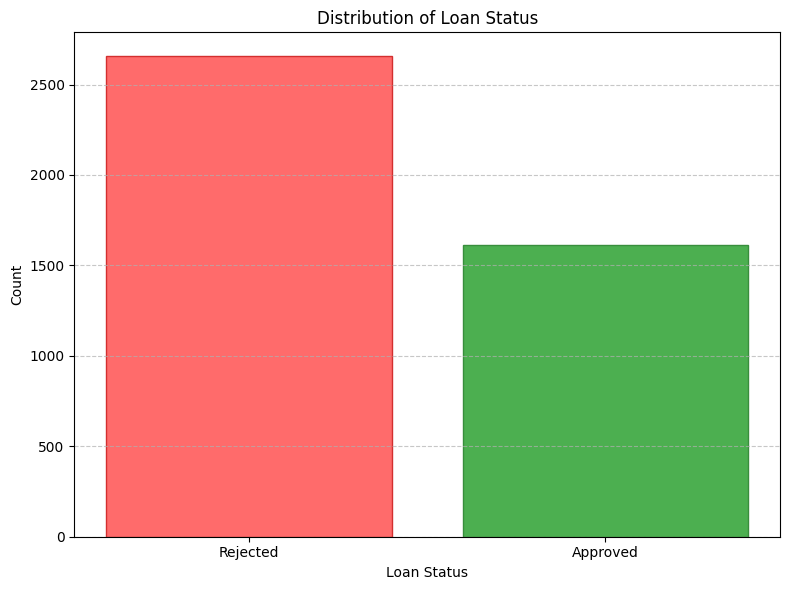

Unique values in ' loan_status':
[0 1]


In [13]:
# Print column names to confirm
print("Available columns in the dataset:")
print(df.columns.tolist())

# Set the target column (note the leading space in ' loan_status')
target_column = ' loan_status'

# Check if the target column exists
if target_column not in df.columns:
    raise ValueError(f"Column '{target_column}' not found in the dataset. Please check the column names above and update the target_column variable.")

# Calculate distribution of the target variable
status_counts = df[target_column].value_counts()

# Create bar chart
plt.figure(figsize=(8, 6))
plt.bar(status_counts.index, status_counts.values, color=['#FF6B6B', '#4CAF50'], edgecolor=['#D32F2F', '#388E3C'], linewidth=1)
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status')
plt.xticks(status_counts.index, ['Rejected', 'Approved'])  # Adjust labels based on dataset values
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show plot
plt.show()

# Print the unique values in loan_status to confirm
print(f"Unique values in '{target_column}':")
print(df[target_column].unique())

In [6]:
df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [7]:
# Data preprocessing
# Handle missing values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
df[num_cols] = num_imputer.fit_transform(df[num_cols])

In [8]:
# Encode categorical variables
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [9]:
# Define features and target (assuming 'Loan_Status' is the target column)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from imblearn.over_sampling import SMOTE

In [11]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

In [12]:
# Train Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_balanced, y_train_balanced)
lr_pred = lr_model.predict(X_test_scaled)

# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)
dt_pred = dt_model.predict(X_test_scaled)

# Evaluate models
print("Logistic Regression Performance:")
print(classification_report(y_test, lr_pred))

print("\nDecision Tree Performance:")
print(classification_report(y_test, dt_pred))

Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.95      0.90      0.93       536
           1       0.85      0.92      0.88       318

    accuracy                           0.91       854
   macro avg       0.90      0.91      0.90       854
weighted avg       0.91      0.91      0.91       854


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       536
           1       0.96      0.95      0.96       318

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854

